# Librerias

In [1]:
# Instalamos TensorFlow y otras librerías necesarias si no están ya instaladas
!pip install tensorflow matplotlib pillow gdown

# Obtención de datos

In [2]:
from google.colab import drive
import zipfile
import os

# Descargar el archivo desde Google Drive
!gdown 'https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ'

# Descomprimir el archivo ZIP descargado
import zipfile

zip_path = '/content/TP1-3-natural-scenes.zip'  # Nombre del archivo descargado
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('scene_classification')  # Descomprimir en un directorio


Downloading...
From (original): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ
From (redirected): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ&confirm=t&uuid=5421dcb9-c953-4070-829f-cfc5d9311b13
To: /content/TP1-3-natural-scenes.zip
100% 363M/363M [00:12<00:00, 29.6MB/s]


In [3]:
# Verificamos la estructura de los datos
train_dir = '/content/scene_classification/seg_train/seg_train'
test_dir = '/content/scene_classification/seg_test/seg_test'
predict_dir = '/content/scene_classification/seg_pred/seg_pred'

print("Clases de entrenamiento:", os.listdir(train_dir))
print("Ejemplos en 'train/buildings':", len(os.listdir(os.path.join(train_dir, 'buildings'))))


Clases de entrenamiento: ['buildings', 'street', 'glacier', 'forest', 'sea', 'mountain']
Ejemplos en 'train/buildings': 2191


In [4]:
import tensorflow as tf

# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

1 Physical GPUs, 1 Logical GPUs


# Split de datos para el modelo de capas densas

In [6]:
import matplotlib.pyplot as plt
from pathlib import Path

# Directorio de los datos
TRAIN_DATA_DIRECTORY = Path("/content/scene_classification/seg_train/seg_train")
TEST_DATA_DIRECTORY = Path("/content/scene_classification/seg_test/seg_test")


# Tamaño del lote (batch size)
BATCH_SIZE = 32

# Tamaño de las imágenes
IMAGE_HEIGHT = 65
IMAGE_WIDTH = 65


# Dividir el dataset en entrenamiento y validación
train = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DATA_DIRECTORY,
    seed=123,
    label_mode='categorical',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val = tf.keras.utils.image_dataset_from_directory(
    TEST_DATA_DIRECTORY,
    seed=123,
    label_mode='categorical',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)




Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [7]:
# Obtiene los nombres de las clases
class_names = train.class_names
num_classes = len(class_names)
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


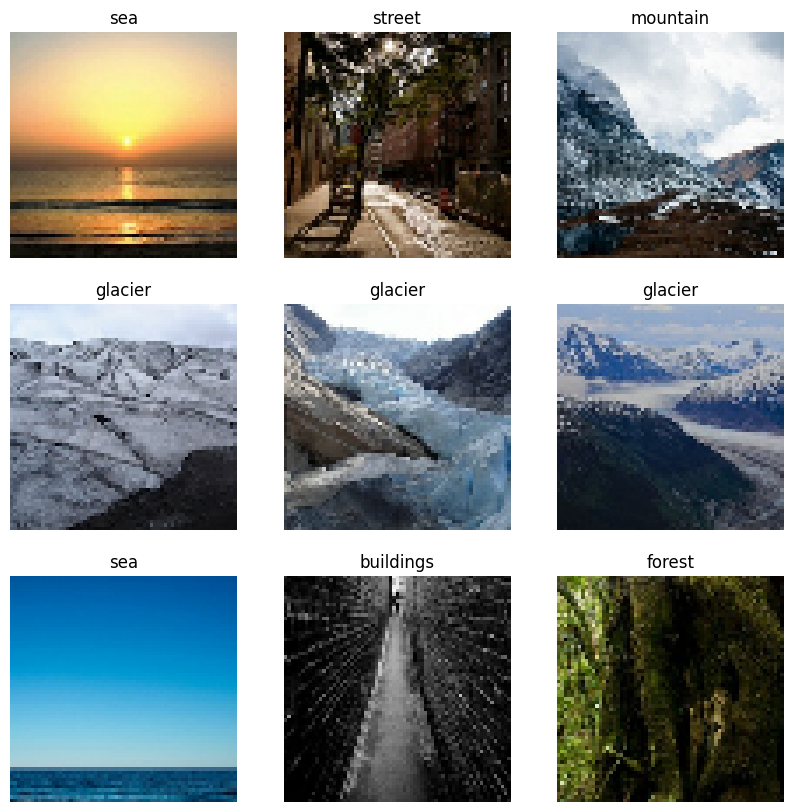

In [8]:
# Muestra algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    class_idx = list(labels[i]).index(1)
    plt.title(class_names[class_idx])
    plt.axis("off")

# Modelo con Capas Densas

In [ ]:
from tensorflow.keras import layers, models

dense_model = models.Sequential([
    layers.Flatten(input_shape=(65, 65, 3)),
    layers.Rescaling(1./255),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

dense_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

dense_history = dense_model.fit(train,
                                validation_data=val,
                                epochs=25,
                                batch_size=512)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


439/439 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.2377 - loss: 2.0335 - val_accuracy: 0.4463 - val_loss: 1.4668
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.3864 - loss: 1.5006 - val_accuracy: 0.4253 - val_loss: 1.3863
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.4285 - loss: 1.4364 - val_accuracy: 0.4740 - val_loss: 1.3637
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4711 - loss: 1.3563 - val_accuracy: 0.4820 - val_loss: 1.3440
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4931 - loss: 1.3124 - val_accuracy: 0.4923 - val_loss: 1.2860
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5148 - loss: 1.2663 - val_accuracy: 0.5207 - val_loss: 1.2909
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5260 - loss: 1.2421 - val_accuracy: 0.5080 - val_loss: 1.2808
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5423 - loss: 1.1984 - val_accuracy: 0.

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


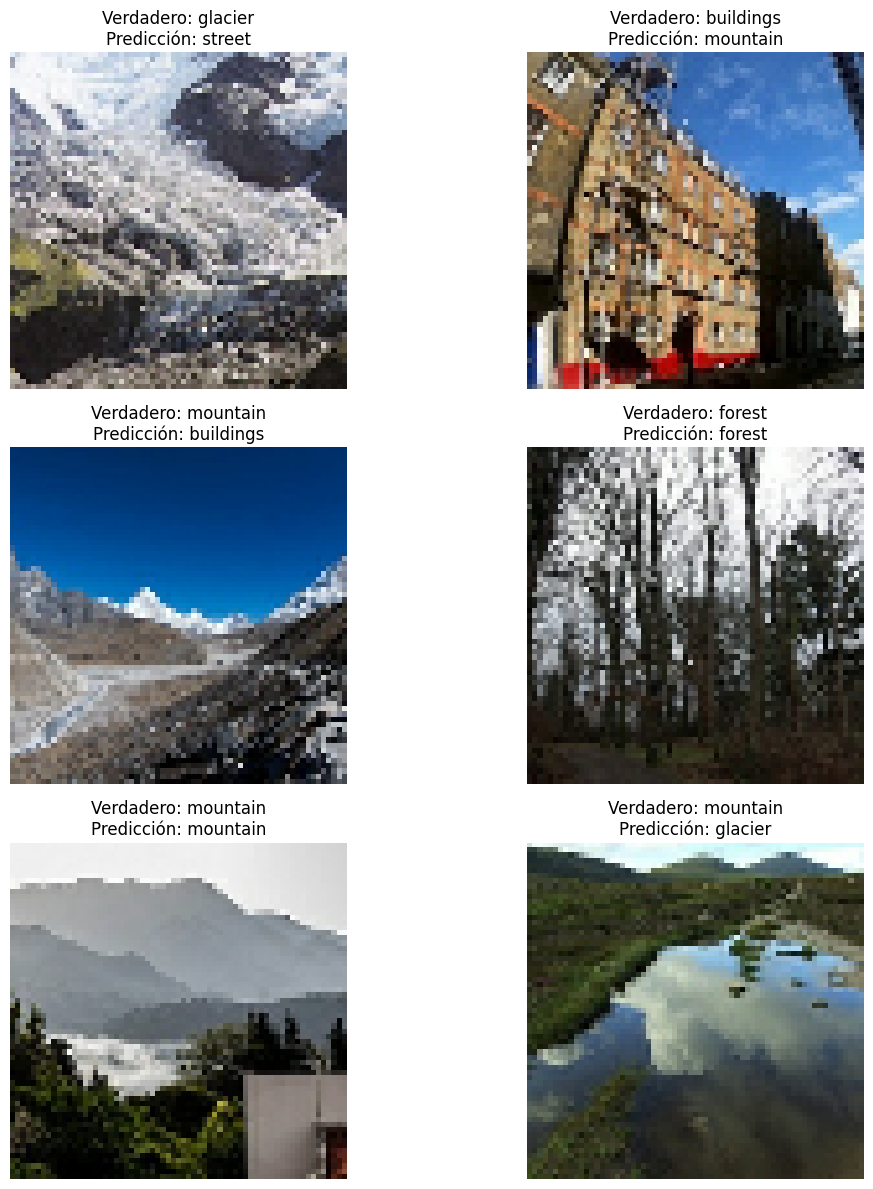

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar predicciones sobre el conjunto de validación
predictions = dense_model.predict(val)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener un lote de imágenes y etiquetas del conjunto de validación
validation_iterator = iter(val)
test_images, test_labels = next(validation_iterator)
true_labels = np.argmax(test_labels, axis=1)

# Graficar algunas imágenes con sus predicciones
def plot_predictions(images, true_labels, predicted_labels, class_names, n=6):
    plt.figure(figsize=(12, 12))
    for i in range(n):
        plt.subplot(3, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_class = class_names[true_labels[i]]
        predicted_class = class_names[predicted_labels[i]]
        plt.title(f"Verdadero: {true_class}\nPredicción: {predicted_class}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Graficar las primeras 6 imágenes y sus predicciones correspondientes
plot_predictions(
    test_images,
    true_labels,
    predicted_classes[:len(true_labels)],  # Asegurarse de que las dimensiones coincidan
    class_names
)


# Split de datos para el modelo de capas densas

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


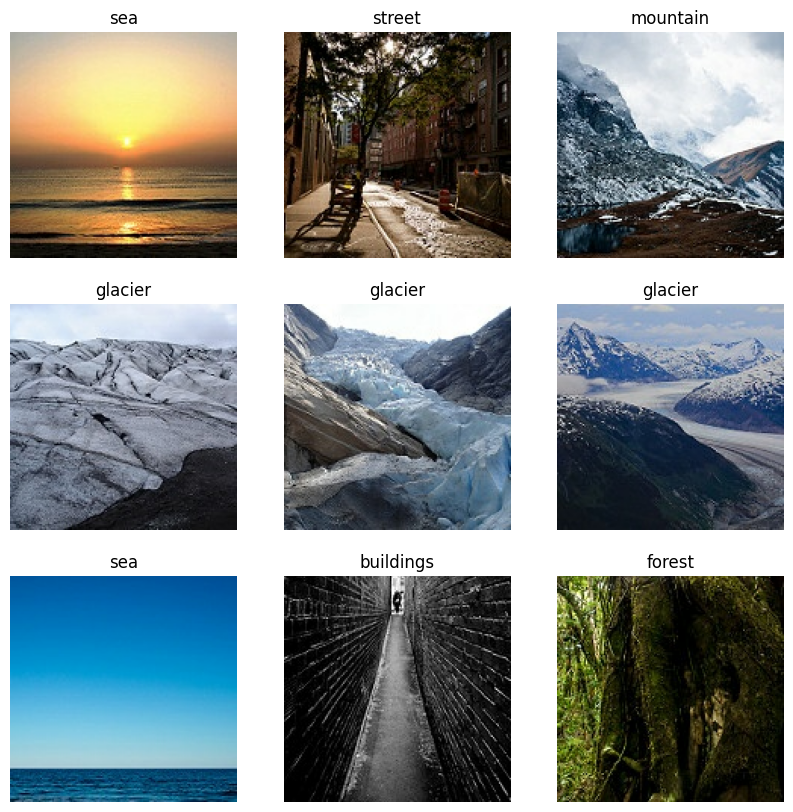

In [9]:
import matplotlib.pyplot as plt
from pathlib import Path

# Directorio de los datos
TRAIN_DATA_DIRECTORY = Path("/content/scene_classification/seg_train/seg_train")
TEST_DATA_DIRECTORY = Path("/content/scene_classification/seg_test/seg_test")


# Tamaño del lote (batch size)
BATCH_SIZE = 32

# Tamaño de las imágenes
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150


# Dividir el dataset en entrenamiento y validación
train = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DATA_DIRECTORY,
    seed=123,
    label_mode='categorical',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val = tf.keras.utils.image_dataset_from_directory(
    TEST_DATA_DIRECTORY,
    seed=123,
    label_mode='categorical',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Obtiene los nombres de las clases
class_names = train.class_names
num_classes = len(class_names)
print(class_names)

# Muestra algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    class_idx = list(labels[i]).index(1)
    plt.title(class_names[class_idx])
    plt.axis("off")

# Modelo con capas convolucionales y densas

mejor accuracy en train pero mucho overfitting:
```python
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.Rescaling(1./255),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(27, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(40, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')
])
```
Epoch 25/25
439/439 ━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9723 - loss: 0.0736 - val_accuracy: 0.7643 - val_loss: 1.5859

In [ ]:
cnn_model = models.Sequential([
    layers.Conv2D(12, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.Rescaling(1./255),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(12, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(6, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(6, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train,
                            epochs=25,
                            validation_data=val)

Epoch 1/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.3510 - loss: 1.4929 - val_accuracy: 0.5367 - val_loss: 1.0352
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5463 - loss: 1.0869 - val_accuracy: 0.6603 - val_loss: 0.9090
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6110 - loss: 0.9684 - val_accuracy: 0.6790 - val_loss: 0.8276
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6386 - loss: 0.9221 - val_accuracy: 0.7023 - val_loss: 0.8220
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6531 - loss: 0.8848 - val_accuracy: 0.7133 - val_loss: 0.7658
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.6592 - loss: 0.8675 - val_accuracy: 0.7057 - val_loss: 0.8128
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6737 - loss: 0.8323 - val_accuracy: 0.7460 - val_loss: 0.7226
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.6881 - loss: 0.8140 - val_

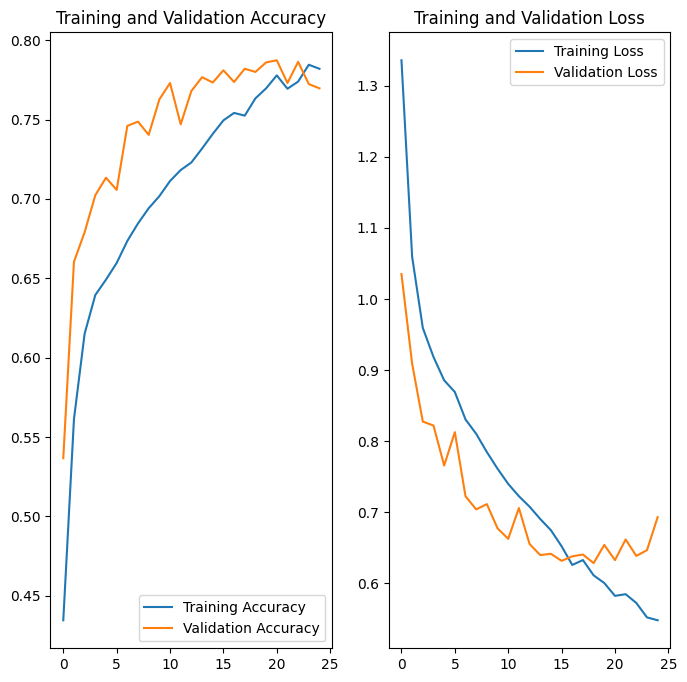

In [ ]:
# Grafica la precisión y pérdida de entrenamiento y validación
acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']

loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


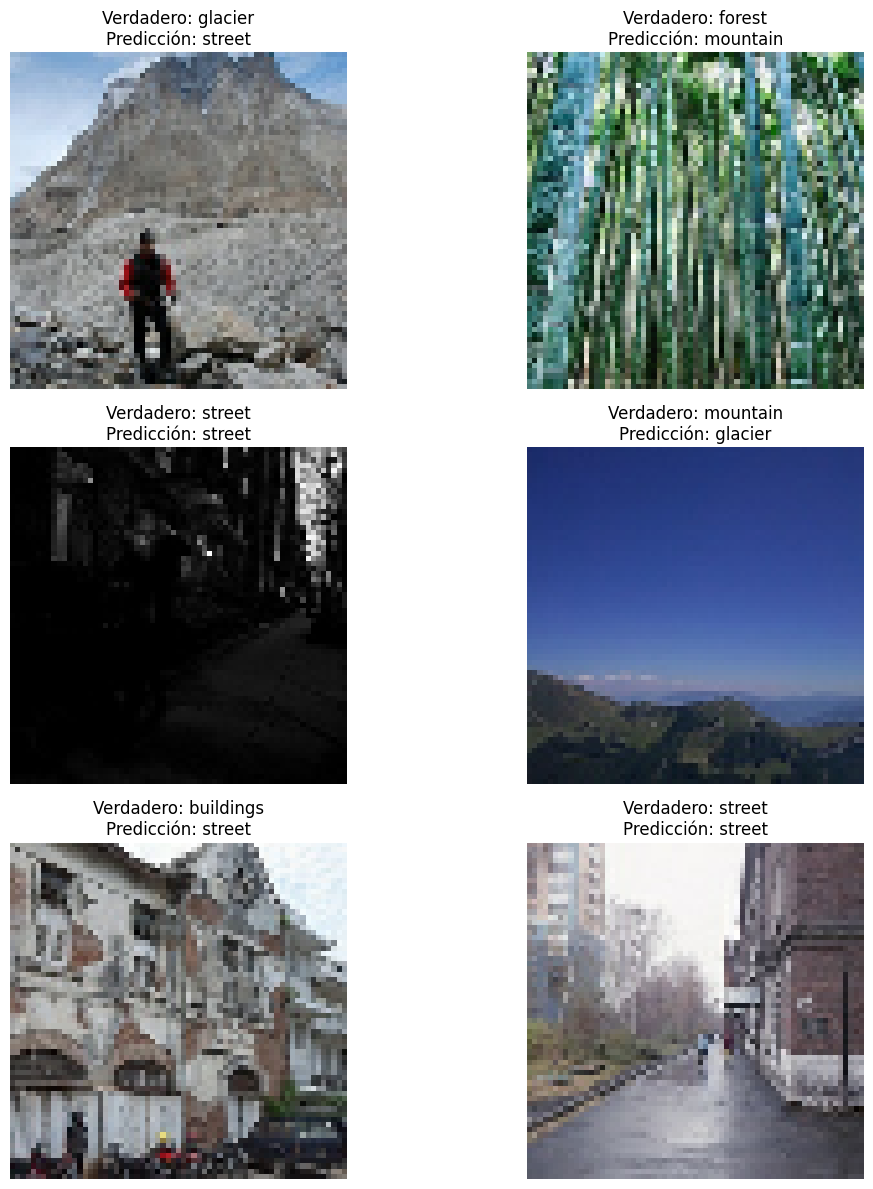

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar predicciones sobre el conjunto de validación
predictions = cnn_model.predict(val)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener un lote de imágenes y etiquetas del conjunto de validación
validation_iterator = iter(val)
test_images, test_labels = next(validation_iterator)
true_labels = np.argmax(test_labels, axis=1)

# Graficar algunas imágenes con sus predicciones
def plot_predictions(images, true_labels, predicted_labels, class_names, n=6):
    plt.figure(figsize=(12, 12))
    for i in range(n):
        plt.subplot(3, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_class = class_names[true_labels[i]]
        predicted_class = class_names[predicted_labels[i]]
        plt.title(f"Verdadero: {true_class}\nPredicción: {predicted_class}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Graficar las primeras 6 imágenes y sus predicciones correspondientes
plot_predictions(
    test_images,
    true_labels,
    predicted_classes[:len(true_labels)],  # Asegurarse de que las dimensiones coincidan
    class_names
)


# Modelo con bloques residuales (ResNet)

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import Rescaling

def residual_block(x, filters, downsample=False):
    shortcut = x
    strides = 2 if downsample else 1

    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, (3, 3), padding='same', activation=None)(x)

    if downsample or x.shape[-1] != shortcut.shape[-1]:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)

    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

input_layer = layers.Input(shape=(150, 150, 3))
x = Rescaling(1./255)(input_layer)
x = layers.Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

# Bloques residuales
x = residual_block(x, 64)
x = residual_block(x, 128, downsample=True)
x = residual_block(x, 128)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(24, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(6, activation='softmax')(x)

resnet_model = models.Model(inputs=input_layer, outputs=output_layer)

resnet_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

resnet_history = resnet_model.fit(train,
                                  epochs=25,
                                  validation_data=val)

Epoch 1/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.2726 - loss: 1.6640 - val_accuracy: 0.4900 - val_loss: 1.3055
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - accuracy: 0.4317 - loss: 1.3035 - val_accuracy: 0.6043 - val_loss: 1.0310
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5150 - loss: 1.1303 - val_accuracy: 0.6237 - val_loss: 0.9011
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.5486 - loss: 1.0539 - val_accuracy: 0.6520 - val_loss: 0.8618
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.6036 - loss: 0.9611 - val_accuracy: 0.6800 - val_loss: 0.8389
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6249 - loss: 0.9138 - val_accuracy: 0.7100 - val_loss: 0.7137
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.6464 - loss: 0.8692 - val_accuracy: 0.6870 - val_loss: 0.7920
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.6867 - loss: 0.8095 - 

# Transfer learning (ResNet50, MobileNetV2, etc.)

In [ ]:

# Tamaño de las imágenes
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224


# Dividir el dataset en entrenamiento y validación
train = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DATA_DIRECTORY,
    seed=123,
    label_mode='categorical',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val = tf.keras.utils.image_dataset_from_directory(
    TEST_DATA_DIRECTORY,
    seed=123,
    label_mode='categorical',
    image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Congelamos las capas base

tl_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(6, activation='softmax')
])

tl_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

tl_history = tl_model.fit(train,
                          epochs=10,
                          validation_data=val)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 67s 128ms/step - accuracy: 0.7939 - loss: 5.2399 - val_accuracy: 0.8980 - val_loss: 0.3441
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.8881 - loss: 0.3945 - val_accuracy: 0.9000 - val_loss: 0.3375
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 85s 113ms/step - accuracy: 0.9048 - loss: 0.3603 - val_accuracy: 0.8987 - val_loss: 0.3243
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 50s 113ms/step - accuracy: 0.9174 - loss: 0.3103 - val_accuracy: 0.9010 - val_loss: 0.3936
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 79s 106ms/step - accuracy: 0.9295 - loss: 0.2786 - val_accuracy: 0.9027 - val_loss: 0.4049
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.9201 - loss: 0.3555 - val_accuracy: 0.9020 - val_loss: 0.4316
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 47s 106ms/step - accuracy: 0.9237 - loss: 0.3076 - val_accuracy: 0.9083 - val_loss: 0.3731
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.9315 - loss: 0

# Evaluación del rendimiento

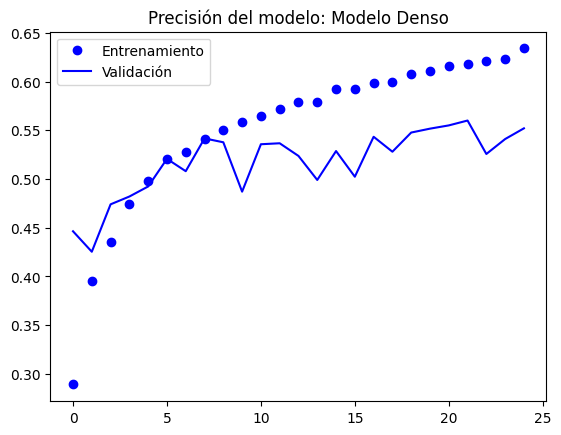

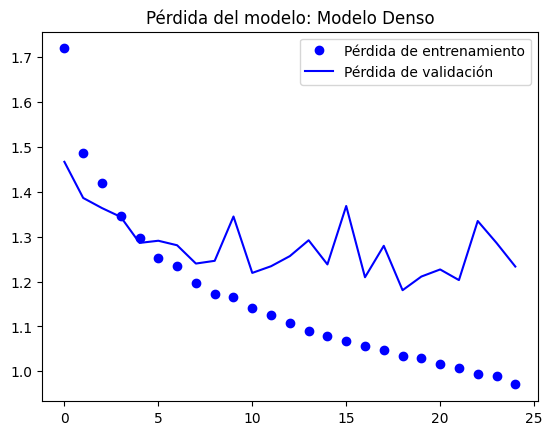

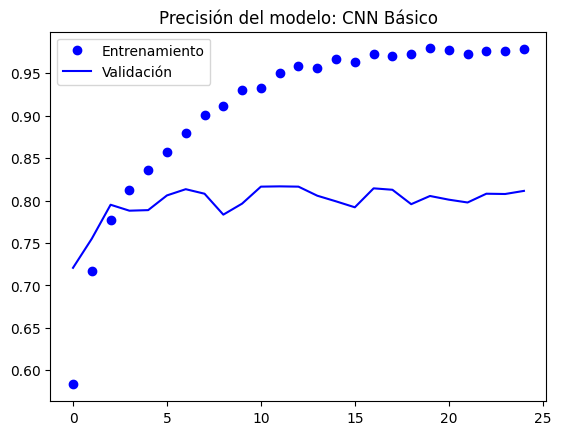

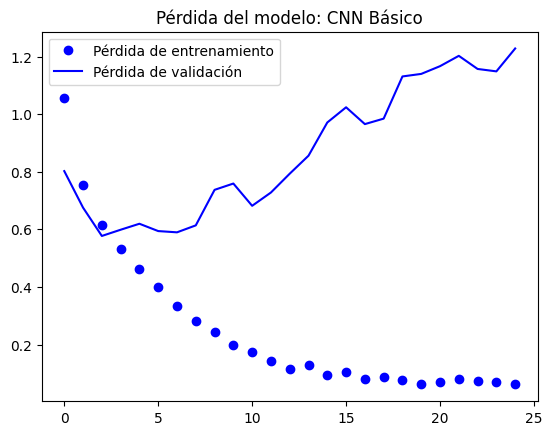

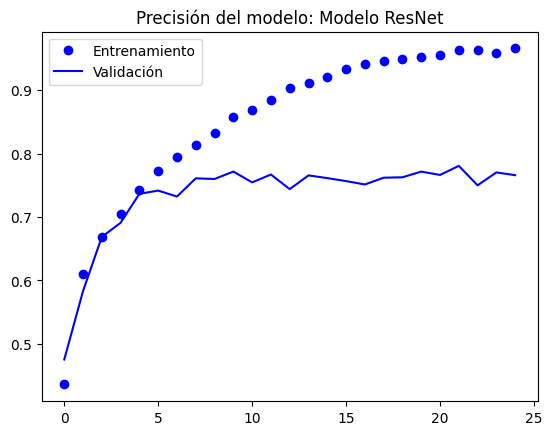

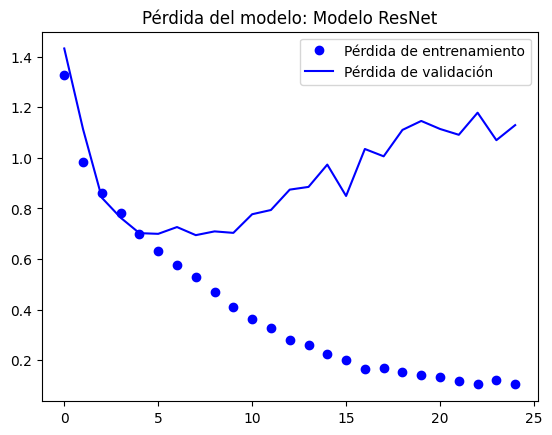

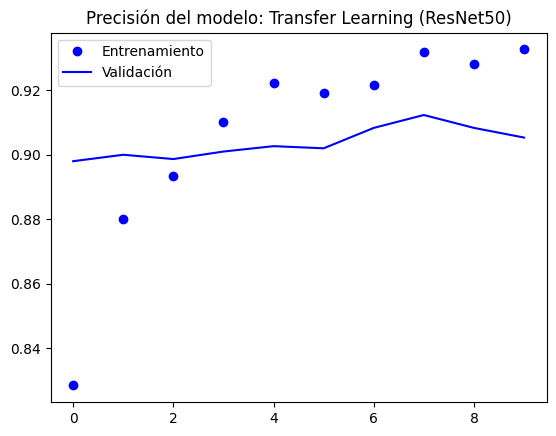

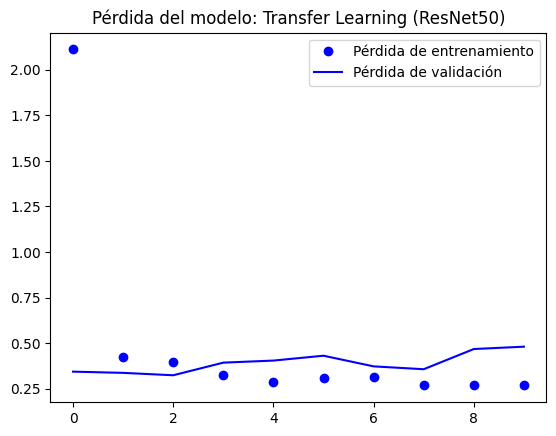

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Entrenamiento')
    plt.plot(epochs, val_acc, 'b', label='Validación')
    plt.title(f'Precisión del modelo: {title}')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
    plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
    plt.title(f'Pérdida del modelo: {title}')
    plt.legend()

    plt.show()

# Graficar para cada modelo
plot_history(dense_history, 'Modelo Denso')
plot_history(cnn_history, 'CNN Básico')
plot_history(resnet_history, 'Modelo ResNet')
plot_history(tl_history, 'Transfer Learning (ResNet50)')


# Predicción final

In [ ]:
predictions = tl_model.predict(pred)
predicted_classes = predictions.argmax(axis=-1)
print(predicted_classes)


NameError: name 'pred' is not defined